In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

In [3]:
 # Find the HTML table
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [4]:
# Headers
table_header = table.find_all('th')

headers=[]
for header_ele in table_header:
    title=header_ele.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Assemble the scraped data into a Pandas DataFrame
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data
        
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
3729,1889,2018-02-23,1973,133,5,-78.0,730.0
3730,1892,2018-02-24,1974,134,5,-77.0,729.0
3731,1894,2018-02-25,1975,134,5,-76.0,729.0
3732,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
browser.quit()

In [9]:
# Examine the data types of all the DataFrame columns
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
#  Convert the data to the appropriate data types
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3734 entries, 0 to 3733
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3734 non-null   int32         
 1   terrestrial_date  3734 non-null   datetime64[ns]
 2   sol               3734 non-null   int32         
 3   ls                3734 non-null   int32         
 4   month             3734 non-null   int32         
 5   min_temp          3734 non-null   float64       
 6   pressure          3734 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 175.0 KB


In [ ]:
# Answering Questions  

In [12]:
# How many months exist on Mars?
nb_of_months=df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')

There are 12 months on Mars.


In [13]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
unique_days_date=df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the'
      'dataset')

There are 1867 Martian days worth of data in thedataset


In [14]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. 

avg_min_temp=[]

for i in range(1,nb_of_months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_nb"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)      

[{'month_nb': 1, 'avg_min_temp': -77.0}, {'month_nb': 2, 'avg_min_temp': -80.0}, {'month_nb': 3, 'avg_min_temp': -83.0}, {'month_nb': 4, 'avg_min_temp': -83.0}, {'month_nb': 5, 'avg_min_temp': -79.0}, {'month_nb': 6, 'avg_min_temp': -75.0}, {'month_nb': 7, 'avg_min_temp': -72.0}, {'month_nb': 8, 'avg_min_temp': -68.0}, {'month_nb': 9, 'avg_min_temp': -69.0}, {'month_nb': 10, 'avg_min_temp': -72.0}, {'month_nb': 11, 'avg_min_temp': -72.0}, {'month_nb': 12, 'avg_min_temp': -74.0}]


In [17]:
import json
json_mars_temp = json.dumps(avg_min_temp)
# Save json as df 
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Average Min Temperature by Month')

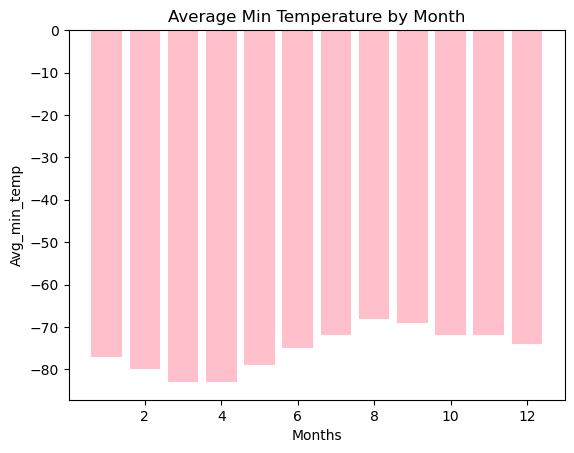

In [21]:
# Plot the results as a bar chart.

plt.bar(df_month_temp['month_nb'],df_month_temp['avg_min_temp'], color='pink')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")

# Create title 
plt.title('Average Min Temperature by Month')

In [ ]:
# Answer: The coldest months are March and April. The warmest months are August and September.

In [22]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 

df_by_month=df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Average Pressure by Month')

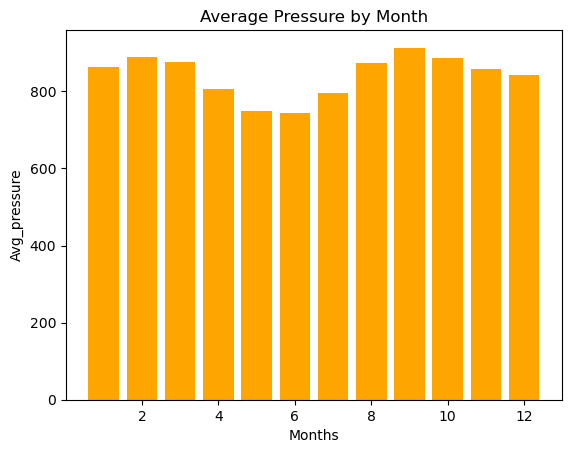

In [26]:
# Plot the results as a bar chart.
# Plot avg_pressure
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'], color='orange')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Average Pressure by Month')

In [ ]:
# Answer: June has the lowest atmospheric pressure while September has the highest atmospheric pressure. 

In [27]:
# how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
orig_sun_long=df['ls'].loc[0]
same_long=df.loc[df['ls']==orig_sun_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0
1867,2,2012-08-16,10,155,6,-75.0,739.0
2465,621,2014-07-03,678,155,6,-77.0,739.0
2466,624,2014-07-04,679,155,6,-77.0,738.0
3116,1274,2016-05-20,1346,155,6,-75.0,737.0
3117,1277,2016-05-21,1347,155,6,-75.0,736.0


In [30]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

j=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-j
print(one_martial_year)

686 days 00:00:00


Text(0.5, 1.0, 'Daily min temp')

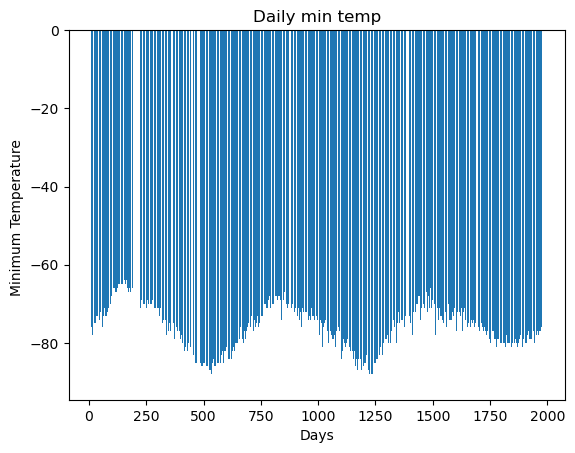

In [32]:
# Visually estimate the result by plotting the daily minimum temperature.

# Ploting the minimum temperature vs Martian Days 
plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily min temp')

In [ ]:
# From looking at the graph, there are three circles in 2000 days. 2000/3 is 666.7 

In [33]:
# Export the DataFrame to a CSV file
df.to_csv('mars_data2.csv',index=False)